<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-study-1.1.1:-Genetic-Codes" data-toc-modified-id="Case-study-1.1.1:-Genetic-Codes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case study 1.1.1: Genetic Codes</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span></li><li><span><a href="#PCA---Visualizing-the-two-principal-components" data-toc-modified-id="PCA---Visualizing-the-two-principal-components-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PCA - Visualizing the two principal components</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K-Means</a></span></li><li><span><a href="#Additional-tasks:" data-toc-modified-id="Additional-tasks:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Additional tasks:</a></span></li></ul></div>

# Case study 1.1.1: Genetic Codes

Notebook setup:

In [10]:
import requests
import numpy as np
import itertools
import pandas as pd
import re
import matplotlib.pyplot as plt
from termcolor import colored

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data 

As it is explained in the guide of Case study 1.1.1, both the genetic sequence of *Caulobacter Crescentus* and the MatLab functions used by the authors, can be download at [link](http://www.ihes.fr/~zinovyev/pcadg/).

With Python's library `requests` we can access the genetic data and transform it in a `string` object:

In [3]:
url = 'http://www.ihes.fr/~zinovyev/pcadg/ccrescentus.fa'
data = ''.join(requests.get(url).text.split('\r\n')[1:])
print('Length of the genetic sequence of Caulobacter Crescentus: {}'.format(len(data)))
print('First 25 characters of the sequence: {}'.format(data[:25]))

Length of the genetic sequence of Caulobacter Crescentus: 305400
First 25 characters of the sequence: gccgatagcctatgatccccggcag


# Feature generation

MatLab function `CalcFreq` generates the features for each 300-characters-long sequence. The next function does the same set of operations:

In [4]:
def CalcFreq(_str,_len,wid):
    '''
    Inputs: 
        _str: complete sequence
        _len: word length (1 to 4 characters)
        wid:  fragments length (in this study: 300 characters)
    Output:
        xx: feature matrix
    '''
    #Cutting sequence into 300 char long pieces
    frags = [_str[i:i+wid] for i in range(0, len(_str), wid)]
    
    #GEnerating possible char combinantions (features)
    chars = ['a','c','g','t']
    features = [''.join(i) for i in list(itertools.product(chars,repeat=_len))]
    
    #Calculating the count of each feature
    xx = np.zeros((len(frags),len(features)))
    for i,frag in enumerate(frags):
        frag = [frag[i:i+_len] for i in range(0, len(frag), _len)]
        for j,feat in enumerate(features):
            xx[i,j] = frag.count(feat)
    
    return xx

In [5]:
xx1 = CalcFreq(data,1,300)
xx2 = CalcFreq(data,2,300)
xx3 = CalcFreq(data,3,300)
xx4 = CalcFreq(data,4,300)

# PCA - Visualizing the two principal components

Once we have obtained the feature matrices, we can reduce their dimensionality by means of PCA. The following functions calculate the two principal components with Python library `sci-kit learn`, and show the results:

In [8]:
def PCAFreq(xx,_len):
    #Standarization of the features
    std_xx = StandardScaler().fit_transform(xx)
    #Dimensionality reduction with PCA
    pca = PCA(n_components=2)
    princ_components = pca.fit_transform(std_xx)
    plot_PCA(princ_components,_len)
    return princ_components

def plot_PCA(princ_components,_len):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(x=princ_components[:,0],y=princ_components[:,1],
               marker='.',s=3,color='k',
              )
    ax.annotate('M = {}'.format(_len),xy=[0.1,0.8],xytext = (0.1,0.8),
                xycoords = 'axes fraction',fontsize=14)
    plt.show()
    

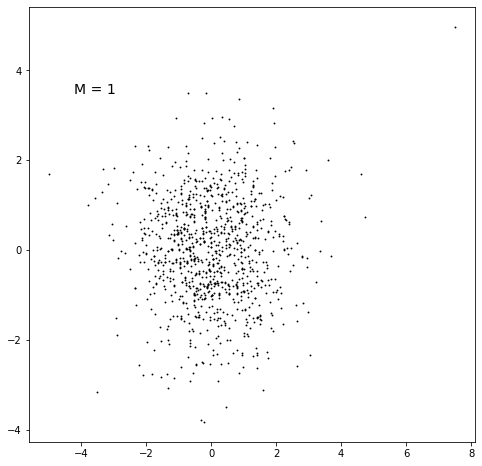

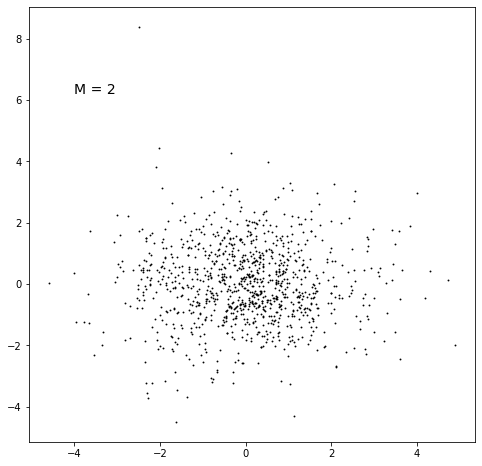

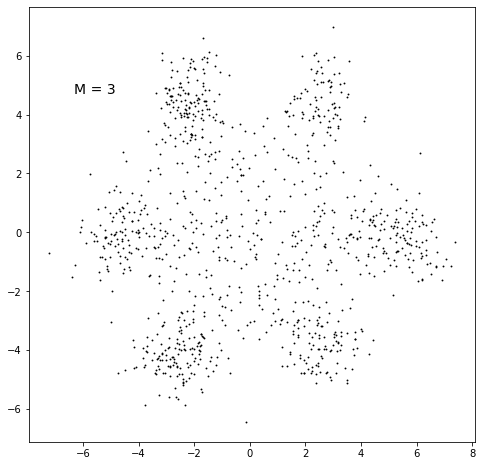

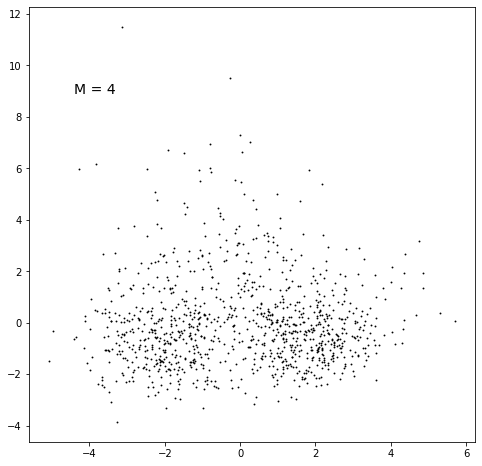

In [9]:
xx1_PCA = PCAFreq(xx1,1)
xx2_PCA = PCAFreq(xx2,2)
xx3_PCA = PCAFreq(xx3,3)
xx4_PCA = PCAFreq(xx4,4)

# K-Means

Finally we can apply K-Means to the matrix generated with 3-characters-long words. Watch out, K-Means is applied to the __64 features__
(not to the two principal components), and then the results can be visualized on top of the PCA analysis, or directly in the genetic sequence.

In [ ]:
def ClustFreq(xx,k):
    std_xx = StandardScaler().fit_transform(xx)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(std_xx)
    clusters = kmeans.labels_
    return clusters

def plot_PCA_colors(xx_PCA,clusters):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    black_cluster = (clusters == 4)
    ax.scatter(x=xx_PCA[black_cluster][:,0],y=xx_PCA[black_cluster][:,1],color='k',
               marker='o',s=10)
    ax.scatter(x=xx_PCA[~black_cluster][:,0],y=xx_PCA[~black_cluster][:,1],
               c=clusters[~black_cluster],cmap='Paired_r',marker='o',s=10)
    plt.show()

def plot_letter_with_colors(data,clusters):
    frags = [data[i:i+300] for i in range(0, len(data), 300)]
    color_map = {0:'grey',2:'red',3:'green',4:'yellow',5:'blue',6:'magenta'}
    for i,frag in enumerate(frags):
        if clusters[i] == 1:
            print(frag)
        else:
            print(colored(frag, color=color_map[clusters[i]]))

In [ ]:
clusters = ClustFreq(xx3,7) 
plot_PCA_colors(xx3_PCA,clusters)

In [ ]:
#plot_letter_with_colors(data,clusters)

# Additional tasks:

You can now try to implement the additional suggested tasks explained in the guide of Case study 1.1.1.

<br>

<br>

<br>

<br>

<br>

<br>

Created by Iñigo de la Maza. Contact: [idelamaza.com](https://idelamaza.github.io/)

<br>

<br>

<br>

In [ ]:
## IGNORE THE CODE BELOW ##

#Getting names of imported libraries and versions for creating a requirements.txt file
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
requirements.append(('termcolor','1.1.0'))    
#Getting the packages already included in requirements.txt
with open(r"../../requirements.txt", "r") as f:
    pkgs = [pkg.split('==')[0] for pkg in f.readlines()]
#Adding missing packages
#print('List of packages and versions:\n')     
with open(r"../../requirements.txt", "a") as f:
    for r in requirements:
        #print("{}=={}".format(*r))
        if r[0] not in pkgs:
            f.write("{}=={}\n".format(*r))